# Assignment 2

Import Required Libraries

Total Stiffness Matrix:
 [[ 18900.  18900. -18900.  18900.      0.      0.]
 [ 18900.  25200. -18900.  12600.      0.      0.]
 [-18900. -18900.  37800.      0. -18900.  18900.]
 [ 18900.  12600.      0.  50400. -18900.  12600.]
 [     0.      0. -18900. -18900.  18900. -18900.]
 [     0.      0.  18900.  12600. -18900.  25200.]]
Displacement:
 [[ 0.        ]
 [ 0.        ]
 [-0.00092593]
 [-0.00019841]
 [ 0.        ]
 [ 0.00079365]]
Reactions:
 [[ 13.75]
 [ 15.  ]
 [-20.  ]
 [  0.  ]
 [  6.25]
 [  0.  ]]
SF and BM for element 1: 
 [[ 13.75]
 [ 15.  ]
 [-13.75]
 [ 12.5 ]]


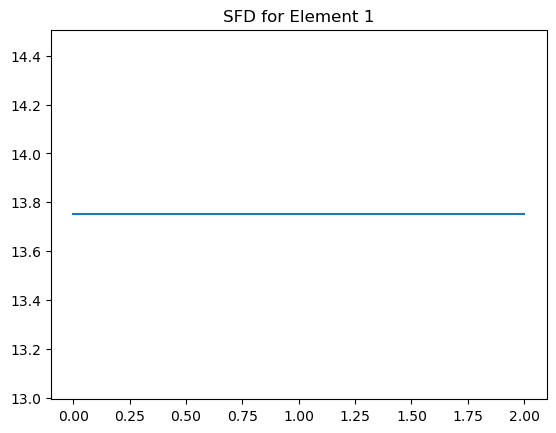

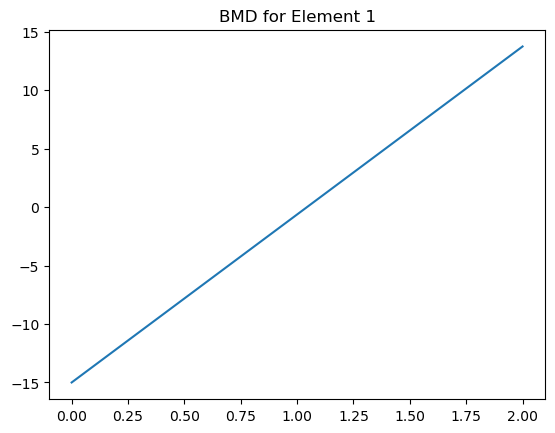

SF and BM for element 2: 
 [[ -6.25]
 [-12.5 ]
 [  6.25]
 [  0.  ]]


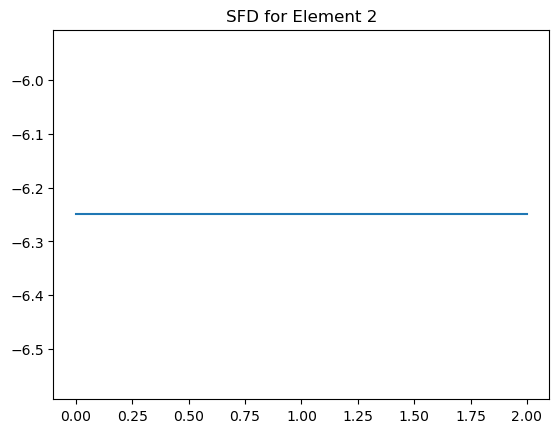

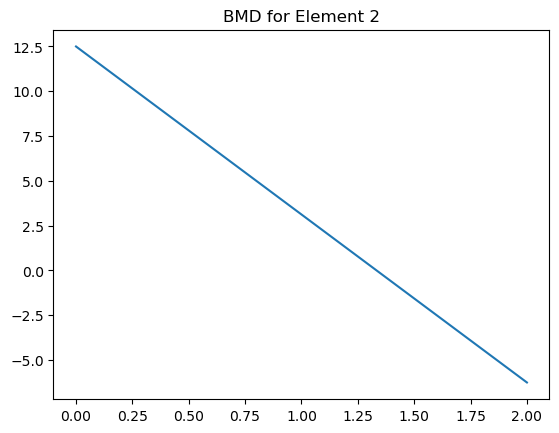

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#the given data

E=210000000
I=60*10**-6
Point_load=20
L=[2,2]
tot_nodes = 3
u = [0,0,1,1,0,1]
load_vec = np.array([-Point_load,0,0]).reshape((3,1))

#Total stiffness matrix initialised

tot_stiff_matrix = np.zeros((2*tot_nodes,2*tot_nodes))
k_matrix={}
for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  tot_stiff_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]

print("Total Stiffness Matrix:\n",tot_stiff_matrix)


count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*tot_nodes):
  for j in range(2*tot_nodes):
    if u[i]*u[j] == 1:
      reduced_m.append(tot_stiff_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))
#print(reduced_m)

rotation_m = np.linalg.solve(reduced_m, load_vec)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*tot_nodes,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(tot_stiff_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  print('SF and BM for element ' + str(i+1) +': \n', force_mat)
  #xValue=[0,L[i]]
  #yValue=[force_mat[0],force_mat[0]]
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.show()



Total Stiffness Matrix:
 [[  467.   700.  -467.   700.     0.     0.     0.     0.]
 [  700.  1400.  -700.   700.     0.     0.     0.     0.]
 [ -467.  -700.   664.  -306.  -197.   394.     0.     0.]
 [  700.   700.  -306.  2450.  -394.   525.     0.     0.]
 [    0.     0.  -197.  -394.  1772.  1181. -1575.  1575.]
 [    0.     0.   394.   525.  1181.  3150. -1575.  1050.]
 [    0.     0.     0.     0. -1575. -1575.  1575. -1575.]
 [    0.     0.     0.     0.  1575.  1050. -1575.  2100.]]
Displacement:
 [[ 0.        ]
 [ 0.00270531]
 [ 0.        ]
 [-0.00541063]
 [ 0.        ]
 [ 0.00386473]
 [ 0.        ]
 [ 0.        ]]
Reactions:
 [[-1.89371981]
 [ 0.        ]
 [ 1.28463768]
 [-9.33333333]
 [ 6.69603865]
 [ 9.33333333]
 [-6.08695652]
 [ 4.05797101]]
SF and BM for element 1: 
 [[-1.89371981]
 [ 0.        ]
 [ 1.89371981]
 [-5.68115942]]


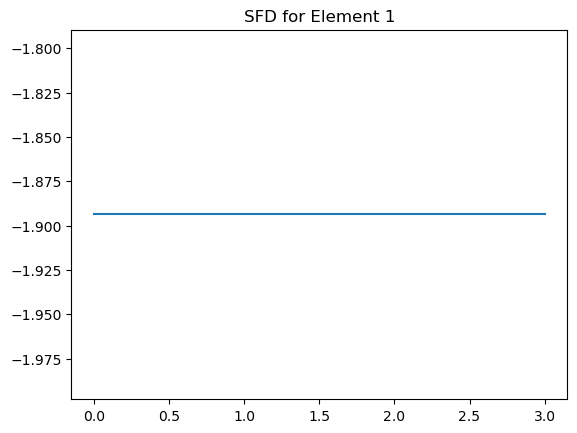

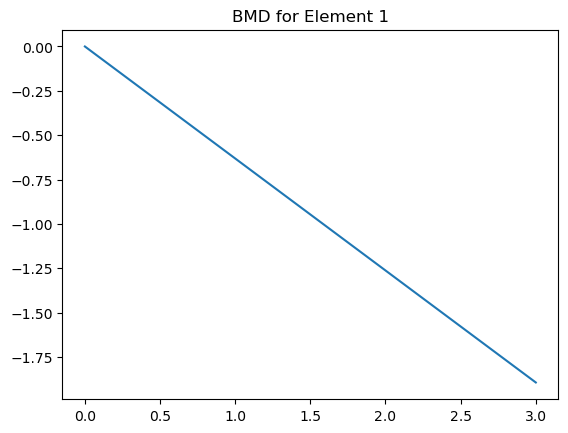

SF and BM for element 2: 
 [[13.39091787]
 [ 5.68115942]
 [14.60908213]
 [-8.11594203]]


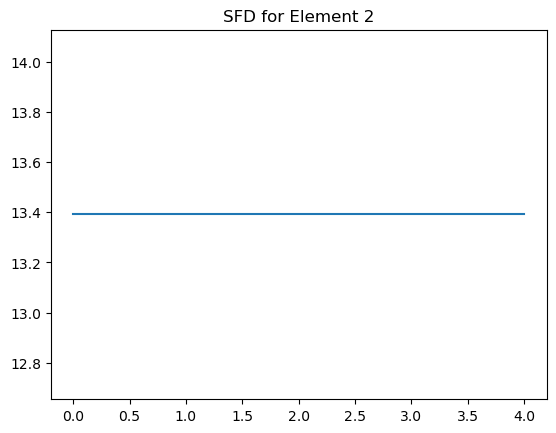

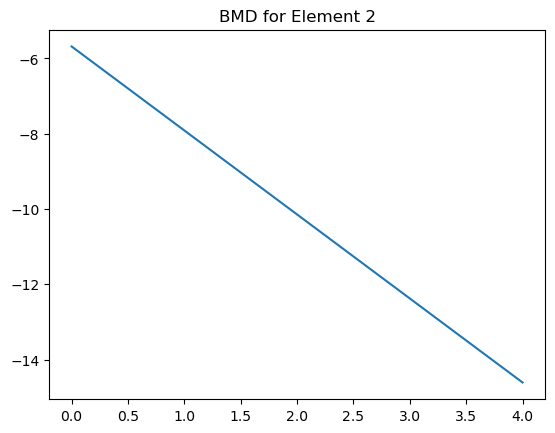

SF and BM for element 3: 
 [[ 6.08695652]
 [ 8.11594203]
 [-6.08695652]
 [ 4.05797101]]


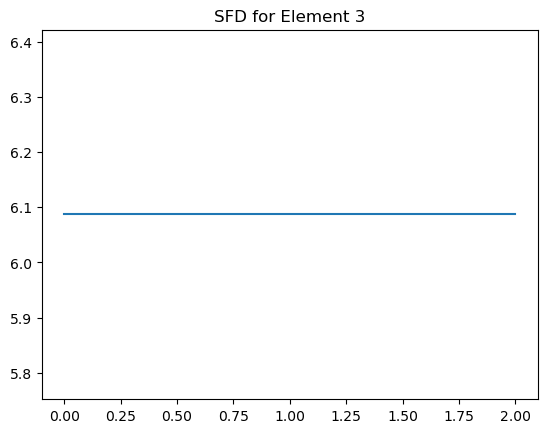

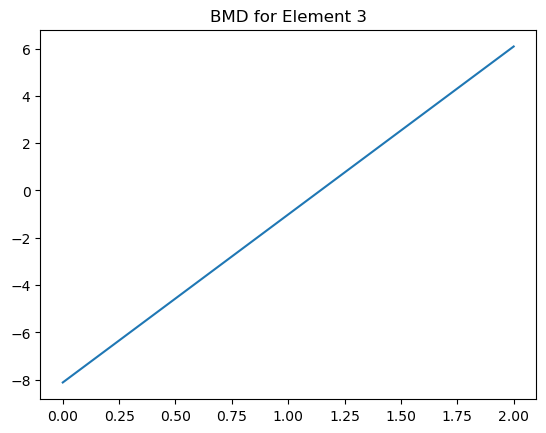

In [7]:
import numpy as np

#Given data

E=210000000
I=5*10**-6
W=7
tot_nodes = 4
L=[3,4,2]
u = [0,1,0,1,0,1,0,0]
loe = 2 # load on element
load_vec = np.array([0,(-1 * W*L[loe-1]**2)/12,(W*L[loe-1]**2)/12]).reshape((3,1))
app_load = np.array([-0.5*W*L[loe-1],(-1 * W*L[loe-1]**2)/12,-0.5*W*L[loe-1],(W*L[loe-1]**2)/12]).reshape((4,1))

#Total stiffness matrix initialised

tot_stiff_matrix = np.zeros((2*tot_nodes,2*tot_nodes))

k_matrix={}
for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  tot_stiff_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]

print("Total Stiffness Matrix:\n",tot_stiff_matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*tot_nodes):
  for j in range(2*tot_nodes):
    if u[i]*u[j] == 1:
      reduced_m.append(tot_stiff_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))

rotation_m = np.linalg.solve(reduced_m, load_vec)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*tot_nodes,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(tot_stiff_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  if i == loe-1:
    force_mat = force_mat - app_load
  print('SF and BM for element ' + str(i+1) +': \n', force_mat)
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.show()

Total Stiffness Matrix 2:
 [[ 1.244000e+03  1.867000e+03 -1.244000e+03  1.867000e+03  0.000000e+00
   0.000000e+00  0.000000e+00]
 [ 1.867000e+03  3.733000e+03 -1.867000e+03  1.867000e+03  0.000000e+00
   0.000000e+00  0.000000e+00]
 [-1.244000e+03 -1.867000e+03  2.488000e+03  0.000000e+00 -1.244000e+03
   1.867000e+03  0.000000e+00]
 [ 1.867000e+03  1.867000e+03  0.000000e+00  7.466000e+03 -1.867000e+03
   1.867000e+03  0.000000e+00]
 [ 0.000000e+00  0.000000e+00 -1.244000e+03 -1.867000e+03  5.001244e+06
  -1.867000e+03 -5.000000e+06]
 [ 0.000000e+00  0.000000e+00  1.867000e+03  1.867000e+03 -1.867000e+03
   3.733000e+03  0.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.000000e+06
   0.000000e+00  5.000000e+06]]
[[2488.    0. 1867.]
 [   0. 7466. 1867.]
 [1867. 1867. 3733.]]
Displacement:
 [[ 0.        ]
 [ 0.        ]
 [-0.00703841]
 [-0.0010061 ]
 [ 0.        ]
 [ 0.00402333]
 [ 0.        ]]
Reactions:
 [[  6.87738815]
 [ 11.26231776]
 [-10.        ]
 [  0.

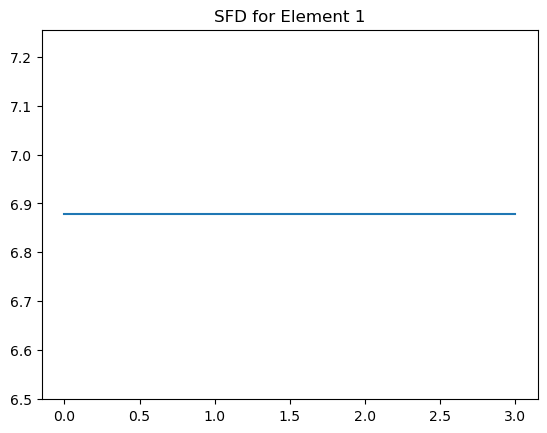

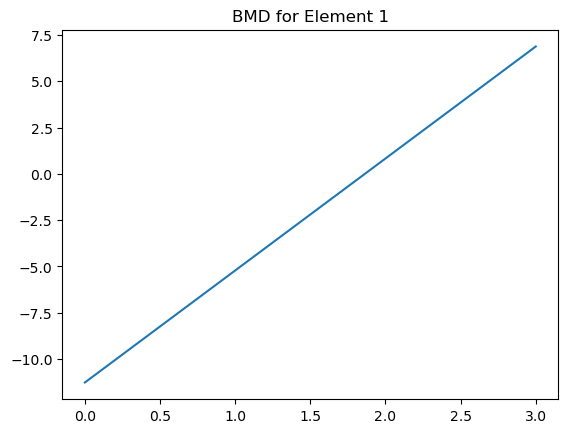

SF and BM for element 2: 
 [[-3.12261185]
 [-9.38492961]
 [ 3.12261185]
 [ 0.        ]]


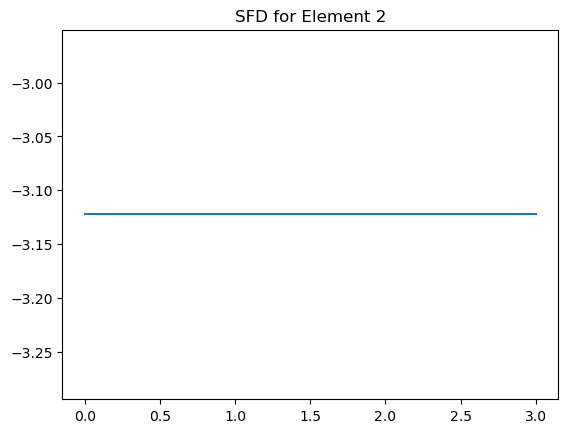

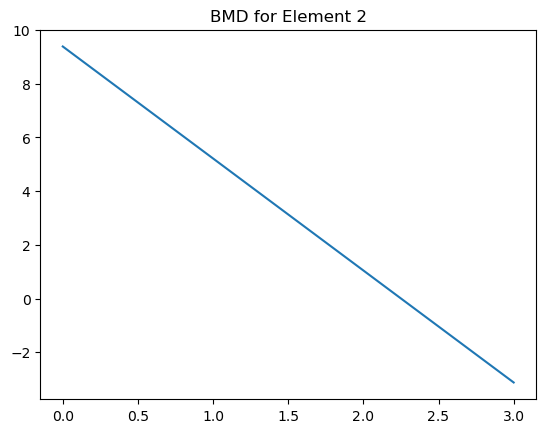

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Given data

E=70000000
I=40*10**-6
k=5*10**6
Point_load=10
L=[3,3]
tot_nodes = 3
u = [0,0,1,1,0,1,0]
load_vec = np.array([-Point_load,0,0]).reshape((3,1))

#Total stiffness matrix initialised

tot_stiff_matrix = np.zeros((2*tot_nodes,2*tot_nodes))
k_matrix={}
for j in range(len(L)):
  esm=np.array([[12,6*L[j],-12, 6*L[j]],[6*L[j], 4*L[j]**2, -6*L[j], 2*L[j]**2],[-12, -6*L[j], 12, -6*L[j]],[6*L[j],2*L[j]**2, -6 *L[j], 4*L[j]**2]])
  k_matrix[j] = np.round((E*I/(L[j]**3)) * esm,0)

for i in range(len(L)):
  tot_stiff_matrix[i+i:i+i+4, i+i:i+i+4] += k_matrix[i]
# convert TSM to 7x7
row_to_add = np.array([0,0,0,0,0,0])
col_to_add = np.array([0,0,0,0,0,0,0])
tot_stiff_matrix = np.vstack((tot_stiff_matrix, row_to_add))
tot_stiff_matrix = np.hstack((tot_stiff_matrix, np.atleast_2d(col_to_add).T))
# Spring Matrix
k_spring = np.array([k,-k,-k,k]).reshape((2,2))
#print(k_spring)
#print("Total Stiffness Matrix:\n",tot_stiff_matrix)
tot_stiff_matrix[4,4] += k_spring[0,0]
tot_stiff_matrix[4,6] += k_spring[0,1]
tot_stiff_matrix[6,4] += k_spring[1,0]
tot_stiff_matrix[6,6] += k_spring[1,1]
print("Total Stiffness Matrix 2:\n",tot_stiff_matrix)

count = 0
for i in u:
  if i==1:
    count+=1

reduced_m = []
for i in range(2*tot_nodes+1):
  for j in range(2*tot_nodes+1):
    if u[i]*u[j] == 1:
      reduced_m.append(tot_stiff_matrix[i][j])
reduced_m = np.array(reduced_m).reshape((count,count))
print(reduced_m)

rotation_m = np.linalg.solve(reduced_m, load_vec)
a=0
b=0
disp_m=[]
for i in u:
  if i == 1:
    disp_m.append(rotation_m[a][0])
    a+=1
  else:
    disp_m.append(u[b])
  b+=1
disp_m = np.array(disp_m).reshape((2*tot_nodes+1,1))
print("Displacement:\n",disp_m)
reactions=np.matmul(tot_stiff_matrix, disp_m)
print("Reactions:\n",reactions)

for i in range(len(L)):
  force_mat = np.matmul(k_matrix[i],disp_m[i+i:i+i+4])
  print('SF and BM for element ' + str(i+1) +': \n', force_mat)
  #xValue=[0,L[i]]
  #yValue=[force_mat[0],force_mat[0]]
  plt.figure()
  plt.title('SFD for Element '+str(i+1))
  plt.plot([0,L[i]],[force_mat[0],force_mat[0]])
  plt.figure()
  plt.title('BMD for Element '+str(i+1))
  plt.plot([0,L[i]],[-1*force_mat[1],-1*force_mat[2]])
  plt.show()